You are trying to measure a difference in the $K_{D}$ of two proteins binding to a ligand.  From previous experiments, you know that the values of replicate measurements of $K_{D}$ follow a normal distribution with $\sigma = 2\ \mu M$.  How many measurements would you need to make to confidently tell the difference between two proteins with $K_{D} = 10 \mu M$ and $K_{D} = 12 \mu M$?

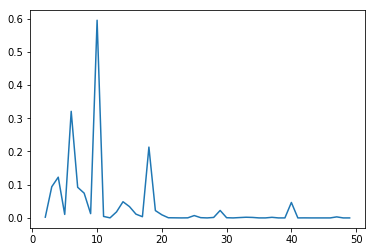

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
from scipy import stats

replicates = range(2,50)
p_values = []
for i in replicates:
    measure_one = np.random.normal(10,2,i)
    measure_two = np.random.normal(12,2,i)
    
    p_values.append(stats.ttest_ind(measure_one,measure_two)[1])

plt.plot(replicates,p_values)


### Goals
+ Know how to use basic `numpy.random` functions to sample from distributions
+ Begin to understand how to write a simulation to probe possible experimental outcomes




### Create a new notebook with this cell at the top

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Figure out how to use `np.random.choice` to simulate 1,000 tosses of a fair coin

In [ ]:
# best solution
tosses = np.random.choice([0,1],1000)

In [ ]:
# okay solution
tosses = []
for i in range(1000):
    tosses.append(np.random.choice([0,1]))

### np.random uses a "pseudorandom" number generator to simulate choices

+ String of numbers that has the same statistical properties as random numbers
+ Numbers are *actually* generated deterministically

#### Numbers *look* random...

(array([ 9980., 10096.,  9971., 10020., 10017.,  9930.,  9997.,  9981.,
         9818., 10190.]),
 array([1.25214565e-05, 1.00009200e-01, 2.00005879e-01, 3.00002559e-01,
        3.99999238e-01, 4.99995917e-01, 5.99992596e-01, 6.99989275e-01,
        7.99985954e-01, 8.99982633e-01, 9.99979312e-01]),
 <a list of 10 Patch objects>)

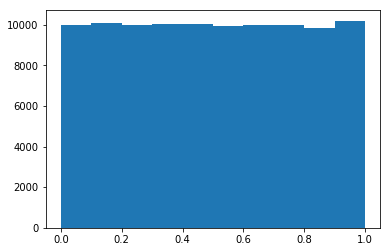

In [30]:
numbers = np.random.random(100000)
plt.hist(numbers)

#### But numbers are *actually* deterministic...

In [31]:
def simple_psuedo_random(current_value,
                         multiplier=13110243,
                         divisor=13132):

    return current_value*multiplier % divisor  

(array([105., 105., 107.,  91.,  93.,  90.,  91., 105., 107., 106.]),
 array([  160. ,  1441.2,  2722.4,  4003.6,  5284.8,  6566. ,  7847.2,
         9128.4, 10409.6, 11690.8, 12972. ]),
 <a list of 10 Patch objects>)

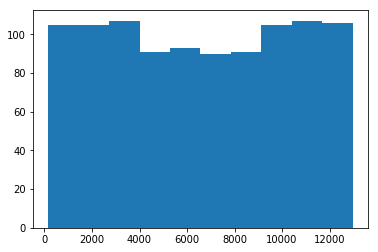

In [33]:
seed = 10218888

out = []
current = seed
for i in range(1000):
    current = simple_psuedo_random(current)
    out.append(current)

plt.hist(out)

### python uses the Mersenne Twister to generate pseudorandom numbers

![mersennetwister](https://upload.wikimedia.org/wikipedia/commons/b/b5/Mersenne_Twister_visualisation.svg)

### What does the `seed` do? 

In [ ]:
seed = 1021888

out = []
current = seed
for i in range(1000):
    current = simple_psuedo_random(current)
    out.append(current)


### What will we see if I run this cell twice in a row? 

In [37]:
s1 = np.random.random(10)
print(s1)


[0.91054531 0.87130892 0.43747984 0.14454913 0.37558088 0.47869707
 0.05645585 0.59729579 0.02436505 0.67063894]


### What will we see if I run this cell twice in a row? 

In [54]:
np.random.seed(5235412)
s1 = np.random.random(10)
print(s1)


[0.44616627 0.29423635 0.44965624 0.40469388 0.35328769 0.76140219
 0.15757785 0.69331684 0.31833615 0.94897036]


### A `seed` lets you specify which pseudo-random numbers you will use.  
+ If you use the same seed, you will get identical samples. 
+ If you use a different seed, you will get wildly different samples.

### matplotlib.pyplot.hist

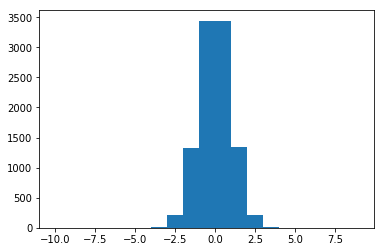

In [56]:
numbers = np.random.normal(size=10000)
counts, bins, junk = plt.hist(numbers,
                              range(-10,10))


#### Basic histogram plotting syntax

```python
COUNTS, BIN_EDGES, GRAPHICS_BIT = plt.hist(ARRAY_TO_BIN,BINS_TO_USE)
```

### Figure out how the function works and report back to the class
+ What the function does
+ Arguments normal people would care about
+ What it returns

In [ ]:
np.random.normal
np.random.binomial
np.random.uniform
np.random.poisson
np.random.choice
np.random.shuffle

#### Calculate:
+ 1000 random samples from a normal distribution with a mean of 5 and a standard deviation of 2. 
+ Create a histogram with a bin size of 1. 

In [ ]:
x = np.random.normal(5,2,size=1000)
counts, edges, _ = plt.hist(x,bins=range(-15,15))
for i in range(len(counts)):
    print(edges[i],counts[i])